In [ ]:
import make_hlc_band1_psfs

(158,) [ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55
  3.6   3.65  3.7   3.75  3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5
  4.6   4.7   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7
  5.8   5.9   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9
  7.    7.1   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1
  8.2   8.3   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3
  9.4   9.5   9.6   9.7   9.95 10.2  10.45 10.7  10.95 11.2  11.45 11.7
 11.95 12.2  12.45 12.7  12.95 13.2  13.45 13.7  13.95 14.2  14.45 14.7
 14.95 15.2 ]
(24,) [  0.  15.  30.  45.  60.  75. 

Process ForkPoolWorker-77:
Process ForkPoolWorker-74:
Process ForkPoolWorker-78:
Process ForkPoolWorker-75:
Traceback (most recent call last):
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/home/u21/kianmilani/.local/lib/python3.9/site-packages/PyPROPER3-3.2.5-py3.9-linux-x86_64.egg/proper/prop_execute_multi.py", line 38, in prop_execute_multi
    psf, sampling = proper.prop_run(routine_name, lamda, gridsize, PASSVALUE = passvalu

  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
Traceback (most recent call last):
  File "/home/u21/kianmilani/.local/lib/python3.9/site-packages/PyPROPER3-3.2.5-py3.9-linux-x86_64.egg/proper/prop_execute_multi.py", line 38, in prop_execute_multi
    psf, sampling = proper.prop_run(routine_name, lamda, gridsize, PASSVALUE = passvalue, QUIET = quiet, PHASE_OFFSET = phase_offset, IS_MULTI=True)
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/u21/kianmilani/.local/lib/python3.9/site-packages/PyPROPER3-3.2.5-py3.9-linux-x86_64.egg/proper/prop_run.py", line 145, in prop_run
    psf_ilam, pixscale = func(lam[ilam], gridsize, kwargs["PASS

In [6]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time
from pathlib import Path
import copy
import matplotlib.pyplot as plt

import proper
proper.prop_use_fftw(DISABLE=True)

import roman_phasec_proper
roman_phasec_proper.copy_here()

import misc
from matplotlib.patches import Circle

data_dir = Path('/groups/douglase/kians-data-files/disk-processing')

wavelength_c = 575e-9*u.m
D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

# define desired PSF dimensions and pixelscale in units of lambda/D
# npsf = 64
# psf_pixelscale = 13e-6
# psf_pixelscale_lamD = 500/575 * 1/2
# psf_pixelscale_mas = psf_pixelscale_lamD*mas_per_lamD/u.pix

psf_pixelscale_mas = 20.8*u.mas/u.pix
psf_pixelscale_lamD = psf_pixelscale_mas.value / mas_per_lamD.value
psf_pixelscale = 13e-6 * psf_pixelscale_lamD/(1/2)
psf_pixelscale_m = psf_pixelscale*u.m/u.pix

polaxis = 10

iwa = 2.8
owa = 9.7

(158,) [ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55
  3.6   3.65  3.7   3.75  3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5
  4.6   4.7   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7
  5.8   5.9   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9
  7.    7.1   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1
  8.2   8.3   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3
  9.4   9.5   9.6   9.7   9.95 10.2  10.45 10.7  10.95 11.2  11.45 11.7
 11.95 12.2  12.45 12.7  12.95 13.2  13.45 13.7  13.95 14.2  14.45 14.7
 14.95 15.2 ]
(24,) [  0.  15.  30.  45.  60.  75. 

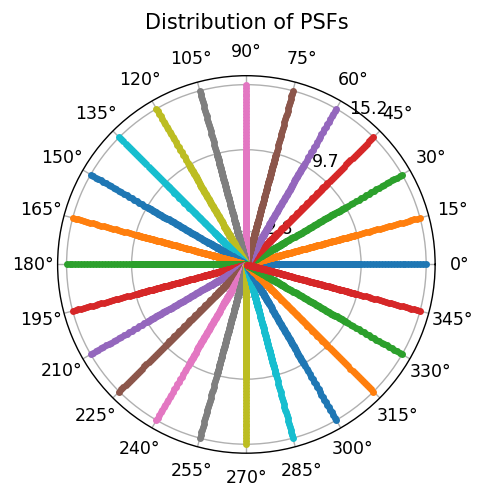

In [3]:
iwa = 2.8
owa = 9.7

# Create the sampling grid the PSFs will be made on
sampling1 = 0.05
sampling2 = 0.1
sampling3 = 0.25
offsets1 = np.arange(0,iwa+1,sampling1)
offsets2 = np.arange(iwa+1,owa,sampling2)
offsets3 = np.arange(owa,15+sampling3,sampling3)

r_offsets = np.hstack([offsets1, offsets2, offsets3])
r_offsets_mas = r_offsets*mas_per_lamD
print(r_offsets.shape, r_offsets)

sampling_theta = 15
thetas = np.arange(0,360,sampling_theta)*u.deg
print(thetas.shape, thetas)

psfs_required = len(thetas)*len(r_offsets)
print(psfs_required)

r_offsets_hdu = fits.PrimaryHDU(data=r_offsets)
r_offsets_fpath = data_dir/'psfs'/'hlc_band1_psfs_radial_samples.fits'
r_offsets_hdu.writeto(r_offsets_fpath, overwrite=True)

thetas_hdu = fits.PrimaryHDU(data=thetas.value)
thetas_fpath = data_dir/'psfs'/'hlc_band1_psfs_theta_samples.fits'
thetas_hdu.writeto(thetas_fpath, overwrite=True)

# Plotting field angles
theta_offsets = []
for r in r_offsets[1:]:
    theta_offsets.append(thetas.to(u.radian).value)
theta_offsets = np.array(theta_offsets)
theta_offsets.shape

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=125)
ax.plot(theta_offsets, r_offsets[1:], '.')
ax.set_rticks([iwa, owa, max(r_offsets)])  # Less radial ticks
ax.set_thetagrids(thetas.value)
ax.set_rlabel_position(55)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title('Distribution of PSFs', va='bottom')
plt.show()

In [4]:
nlam = 7
lam0 = 0.575
bandwidth = 0.1
minlam = lam0 * (1 - bandwidth/2)
maxlam = lam0 * (1 + bandwidth/2)
lam_array = np.linspace( minlam, maxlam, nlam )

dm1 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm1.fits' )
dm2 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm2.fits' )

options = {'cor_type':'hlc', # change coronagraph type to correct band
           'final_sampling_lam0':psf_pixelscale_lamD, 
           'source_x_offset':0,
           'source_y_offset':0,
           'use_fpm':1,
           'use_field_stop':1,
           'use_errors':1,
           'use_lens_errors':1,
           'use_hlc_dm_patterns':0,
           'use_dm1':1, 'dm1_m':dm1, 
           'use_dm2':1, 'dm2_m':dm2,
           'polaxis':polaxis,   
          }



In [8]:
psfs_fpath = data_dir/'psfs'/'hlc_band1_psfs_20220920.fits'

psfs_file = fits.open(psfs_fpath, mode='update')
psfs = psfs_file[0].data
psfs = np.roll(psfs, shift=1, axis=0)
psfs[0] = psf_bb
psfs_file[0].data = psfs
psfs_file.close()

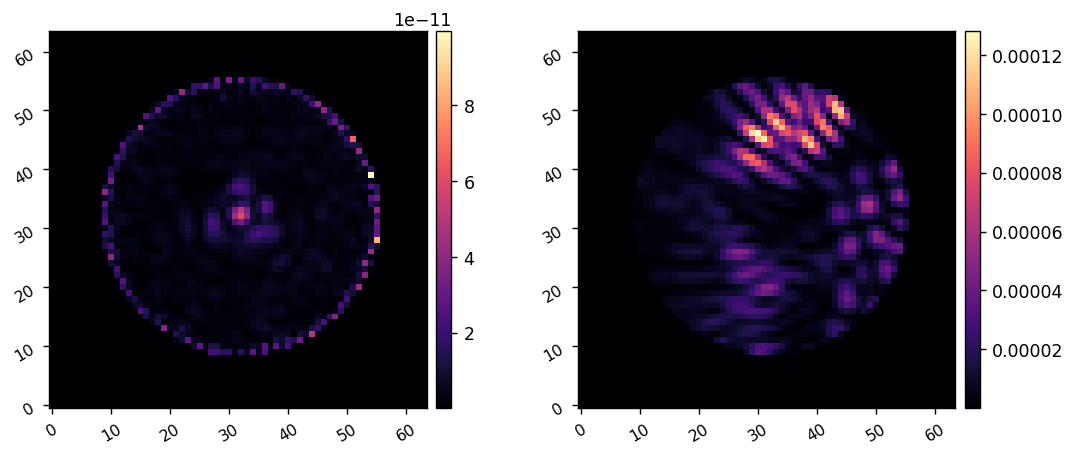

In [9]:
misc.myimshow2(psfs[0], psfs[-1])

Lambda = 5.6542E-07   Throughput = 1.00Lambda = 5.4625E-07   Throughput = 1.00Lambda = 5.5583E-07   Throughput = 1.00Lambda = 5.7500E-07   Throughput = 1.00

Lambda = 5.8458E-07   Throughput = 1.00Lambda = 5.9417E-07   Throughput = 1.00Lambda = 6.0375E-07   Throughput = 1.00




Applying lens
Applying lens
Applying lens
Applying lens
Applying lensApplying lens

Applying lens
Propagating to secondaryPropagating to secondary

Propagating to secondaryPropagating to secondary

Propagating to secondary
Propagating to secondary
Propagating to secondary
Applying lensApplying lens

Applying lens
Applying lens
Applying lens
Applying lens
Applying lens
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to POMA FOLD
Propagating to M3
Propagating to M3Propagating to M3

Propagating to M3
Propagating to M3
Propagating to M3
Propagating to M3
Applying lens
Applying lens
Applying lens
Applyi

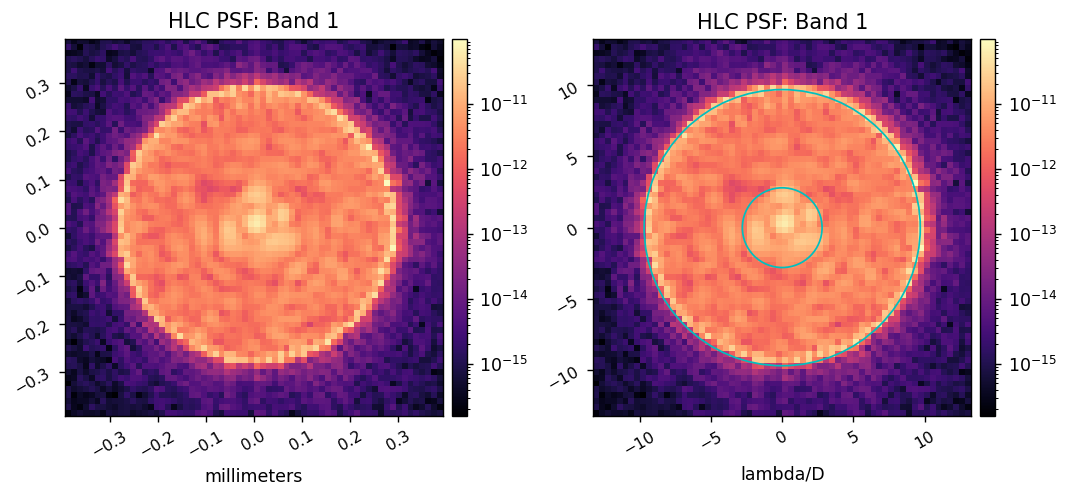

In [7]:
(wfs, pxscls_m) = proper.prop_run_multi('roman_phasec', lam_array, npsf, QUIET=False, PASSVALUE=options)

psfs = np.abs(wfs)**2
psf_bb = np.sum(psfs, axis=0)/nlam
psf_pixelscale_m = pxscls_m[0]*u.m/u.pix

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow2(psf_bb, psf_bb, 'HLC PSF: Band 1', 'HLC PSF: Band 1',
               lognorm1=True, lognorm2=True, 
               pxscl1=psf_pixelscale_m.to(u.mm/u.pix), pxscl2=psf_pixelscale_lamD, patches2=patches)

(64, 64)


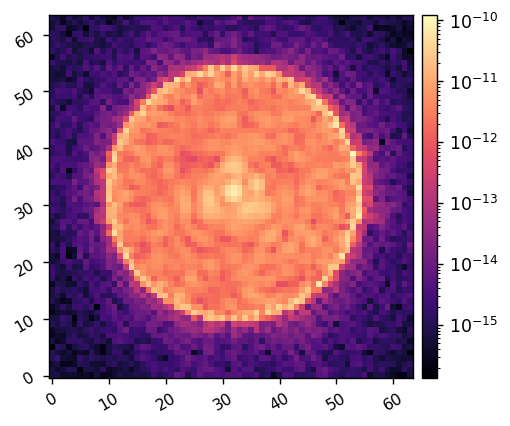

(64, 64)


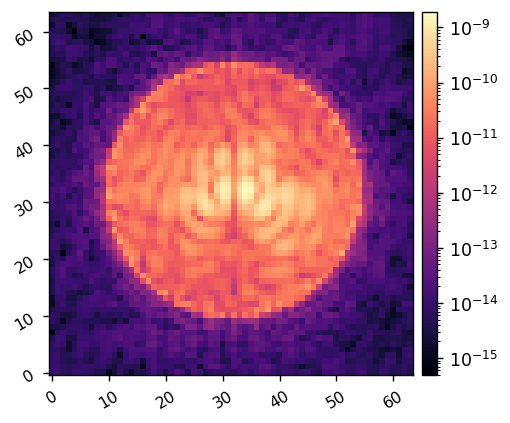

0 33.54611682891846
(64, 64)


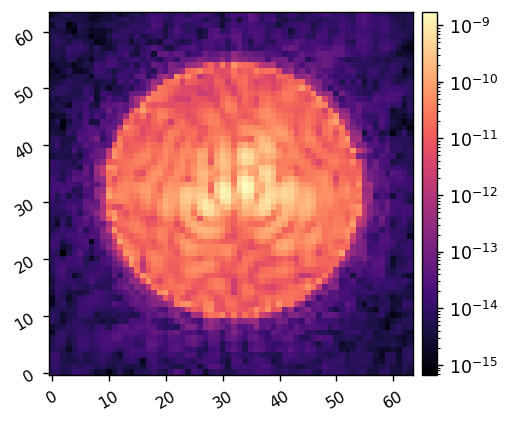

1 51.282660722732544
(64, 64)


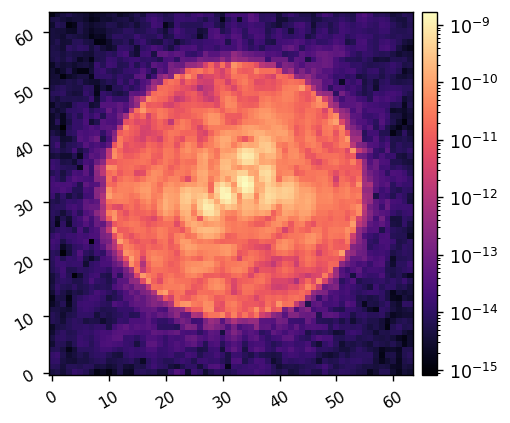

2 69.86469674110413
(64, 64)


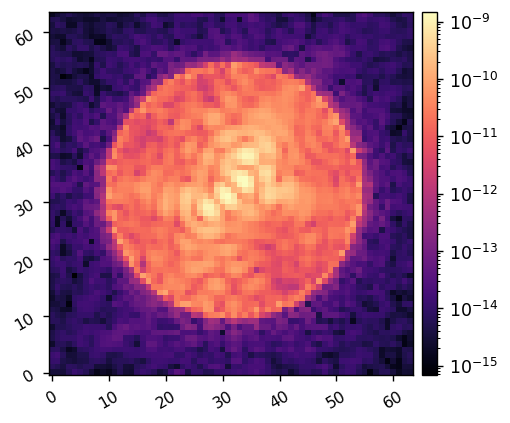

3 88.51382970809937
(64, 64)


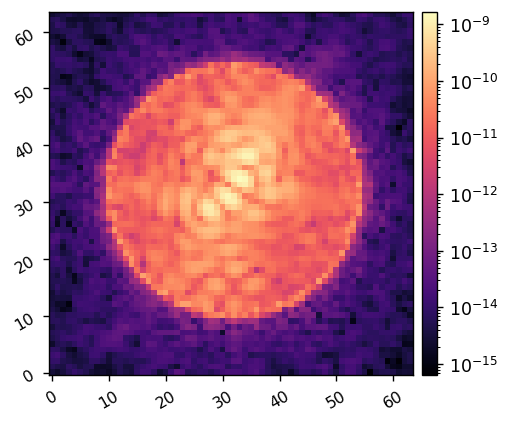

4 107.4478075504303
(64, 64)


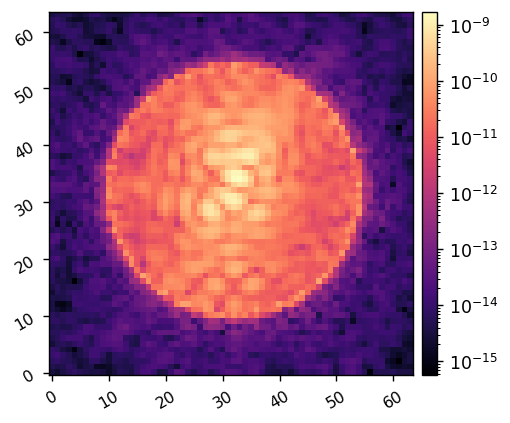

5 126.1071286201477
(64, 64)


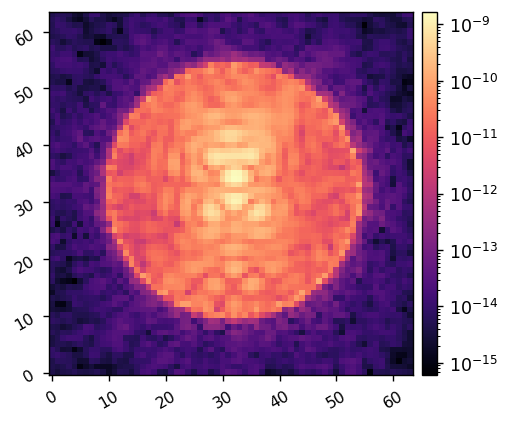

6 145.2633318901062
(64, 64)


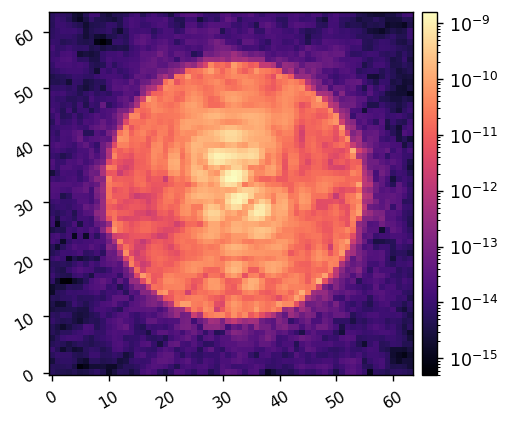

7 165.9756636619568


KeyboardInterrupt: 

Process ForkPoolWorker-100:
Traceback (most recent call last):
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/home/u21/kianmilani/.local/lib/python3.9/site-packages/PyPROPER3-3.2.5-py3.9-linux-x86_64.egg/proper/prop_execute_multi.py", line 38, in prop_execute_multi
    psf, sampling = proper.prop_run(routine_name, lamda, gridsize, PASSVALUE = passvalue, QUIET = quiet, PHASE_OFFSET = phase_offset, IS_MULTI=True)
  File "/home/u21/

  File "/home/u21/kianmilani/.local/lib/python3.9/site-packages/PyPROPER3-3.2.5-py3.9-linux-x86_64.egg/proper/prop_ptp.py", line 81, in prop_ptp
    wf.wfarr *= np.exp((-i*np.pi*wf.lamda*dz)*rhosqr)
KeyboardInterrupt


In [14]:
psfs_array = np.zeros( shape=( (len(r_offsets)-1)*len(thetas) + 1, npsf,npsf) )

count = 0
start = time.time()
for i,r in enumerate(r_offsets): 
    opts = []
    for j,th in enumerate(thetas):
        xoff = r*np.cos(th)
        yoff = r*np.sin(th)
        options.update( {'source_x_offset':xoff.value, 'source_y_offset':yoff.value} )
    
        (wfs, pxscls_m) = proper.prop_run_multi('roman_phasec', lam_array, npsf, QUIET=True, PASSVALUE=options)

        psfs = np.abs(wfs)**2
        psf = np.sum(psfs, axis=0)/nlam
        
        print(psf.shape)
        misc.myimshow(psf, lognorm=True)
        
        if r<r_offsets[1]: 
            psfs_array[0] = psf
            break
        else: psfs_array[count] = psf
            
        print(count, time.time()-start)
        count += 1

In [ ]:
for i in range(psfs_array.shape[0]):
    clear_output(wait=True)
    misc.myimshow(psfs_array[i], 'PSF {:d}'.format(i), lognorm=True)
    time.sleep(0.1)

In [9]:
hdr = fits.Header()
hdr['PXSCLAMD'] = psf_pixelscale_lamD
hdr.comments['PXSCLAMD'] = 'pixel scale in lam0/D per pixel'
hdr['PXSCLMAS'] = psf_pixelscale_mas.value
hdr.comments['PXSCLMAS'] = 'pixel scale in mas per pixel'
hdr['PIXELSCL'] = psf_pixelscale_m.value
hdr.comments['PIXELSCL'] = 'pixel scale in meters per pixel'
hdr['CWAVELEN'] = wavelength_c.value
hdr.comments['CWAVELEN'] = 'central wavelength in meters'
hdr['BANDPASS'] = 0
hdr.comments['BANDPASS'] = 'bandpass as fraction of CWAVELEN'
hdr['POLAXIS'] = polaxis
hdr.comments['POLAXIS'] = 'polaxis: defined by roman_phasec_proper'

psfs_hdu = fits.PrimaryHDU(data=psfs_array, header=hdr)

psfs_fpath = data_dir/'psfs'/'hlc_band1_psfs_072022.fits'
psfs_hdu.writeto(psfs_fpath, overwrite=True)

# Interpolate the PSFs for the grid of the model

In [ ]:
psfs_fpath = data_dir/'psfs'/'hlc_band1_psfs_072022.fits'
psfs = fits.getdata(psfs_fpath)
print(psfs.shape, len(psfs))

def find_closest_psf(xoff, yoff, verbose=True):
    r = np.sqrt(xoff**2+yoff**2)
    theta = np.arctan2(yoff,xoff).to(u.deg)
    if theta<0: theta += 360*u.deg
        
    kr = np.argmin(np.abs(r_offsets_mas-r))
    if kr>(len(r_offsets)-1):
        kr = len(r_offsets)-1
    kth = np.argmin(np.abs(thetas-theta))
    theta_diff = theta - thetas[kth] # use this to rotate the closest available PSF to the coordinate of interest
    
    if kr==0: 
        kpsf=0
    else: 
        kpsf = 1 + kth + (len(thetas))*(kr-1)
    
    if verbose: 
        print('Desired r={:.2f}, radial index={:d}, closest available r={:.2f}'.format(r, kr, r_offsets_mas[kr]))
        print('Desired th={:.2f}, theta index={:d}, closest available th={:.2f}, difference={:.2f}'.format(theta, kth, thetas[kth], theta_diff))
        print('PSF index = {:d}'.format(kpsf))
    
    closest_psf = psfs[kpsf]
    interpped_psf = rotate(closest_psf, -theta_diff.value, reshape=False, order=5)
    
    return interpped_psf

In [ ]:
r = 200*u.mas
th = 0*u.deg
xoff = r*np.cos(th)
yoff = r*np.sin(th)
psf = find_closest_psf(xoff,yoff)

misc.myimshow(psf, lognorm=True)


# Create grid coordinates for the model

In [ ]:
ndisk = 128
disk_pixelscale_mas = 10.5*u.mas/u.pix

x,y = np.meshgrid(np.arange(-ndisk/2,ndisk/2) + 1/2, np.arange(-ndisk/2,ndisk/2)+1/2 )
x = x.flatten()*disk_pixelscale_mas*u.pix
y = y.flatten()*disk_pixelscale_mas*u.pix
x

In [ ]:
ncols = ndisk**2
ipsf_matrix = np.zeros((npsf**2, ncols))

start=time.time()
for i in range(ncols):
    ipsf = find_closest_psf(x[i], y[i], verbose=False)
    ipsf_matrix[:,i] = ipsf.flatten() # assign the flattened psf to the column
    if i==ncols/8 or i==ncols/4 or i==ncols/2 or i==ncols*3/4 or i==ncols*7/8 or i==ncols-1:
        clear_output()
        print(i, time.time()-start)

In [ ]:
ipsf_fpath = data_dir/'ipsfs'/'hlc_band1_ipsfs_072022.hdf5'
f = h5py.File(ipsf_fpath,'w')
f.create_dataset('ipsf_matrix', data=ipsf_matrix)
f.close()